In [2]:
#Importing libraries and loading dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_excel("Telco_customer_churn.xlsx")
dataset.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# Pre Processing

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [4]:
dataset.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [5]:
#Checking for null values
dataset.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [6]:
#Checking for duplicates
dataset.duplicated().sum()

0

In [7]:
dataset.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [8]:
dataset.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [9]:
# Removing columns
data = (
        dataset.drop(
            [
                "Count",
                "Country",
                "City",
                "Zip Code",
                "Latitude",
                "Longitude",
                "State",
                "CustomerID",
                "Churn Reason",
                "Churn Label",
                "Lat Long",
                "Churn Score"
            ],
            axis = 1
        )
)

In [10]:
data["Total Charges"] = pd.to_numeric(data["Total Charges"], errors = "coerce").fillna(0)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [12]:
data.select_dtypes(include = "object").nunique()

Gender               2
Senior Citizen       2
Partner              2
Dependents           2
Phone Service        2
Multiple Lines       3
Internet Service     3
Online Security      3
Online Backup        3
Device Protection    3
Tech Support         3
Streaming TV         3
Streaming Movies     3
Contract             3
Paperless Billing    2
Payment Method       4
dtype: int64

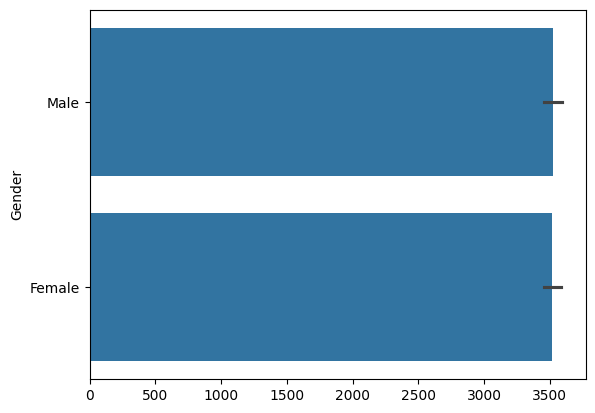

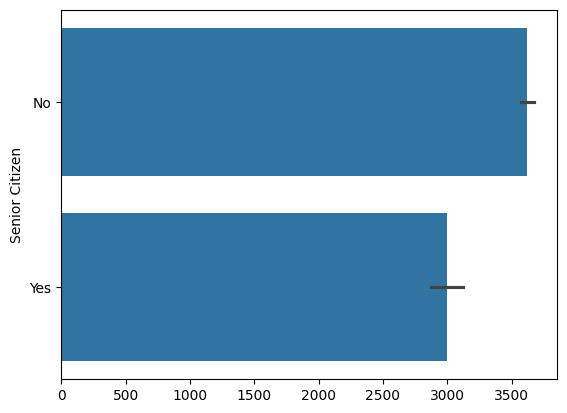

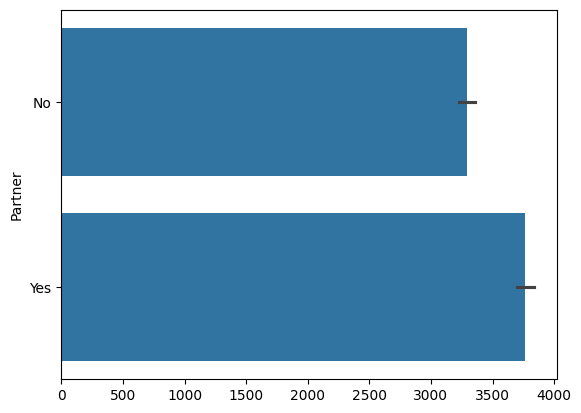

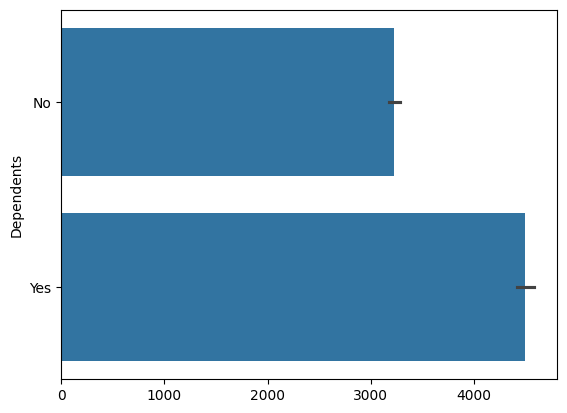

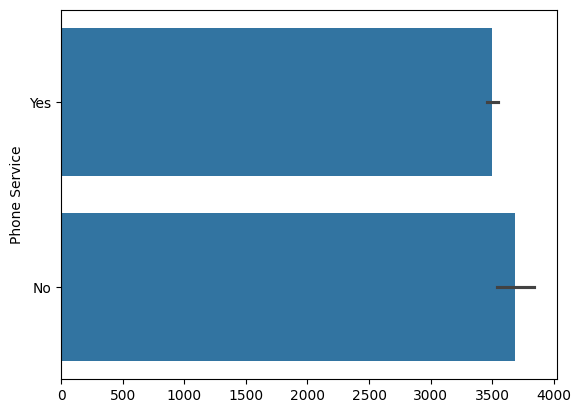

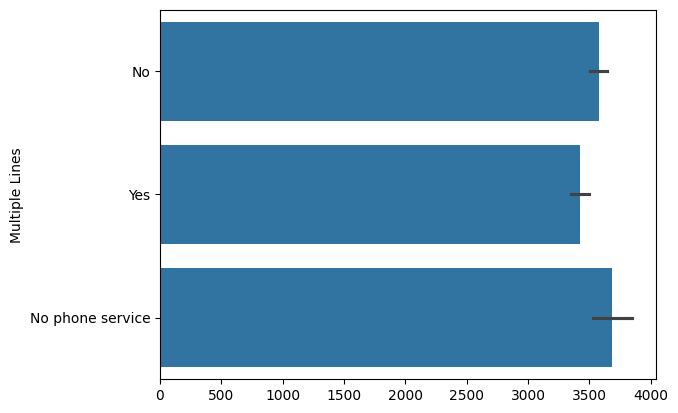

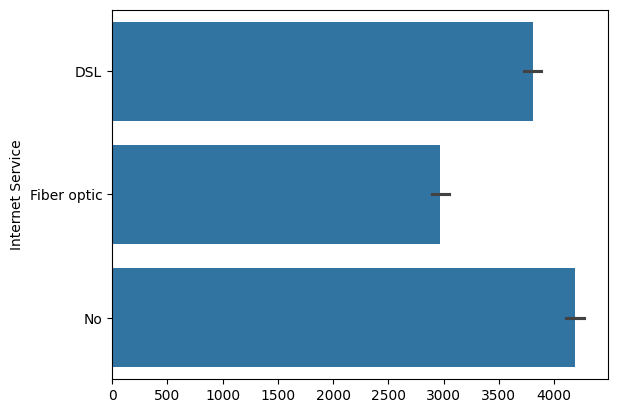

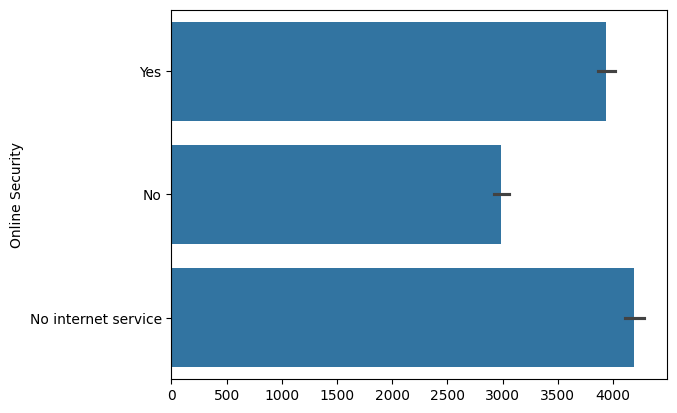

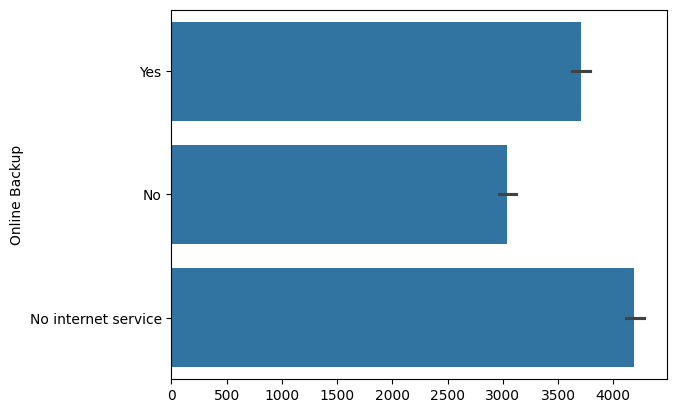

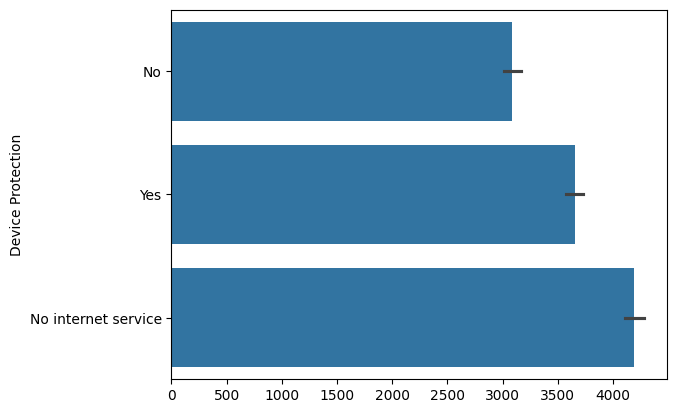

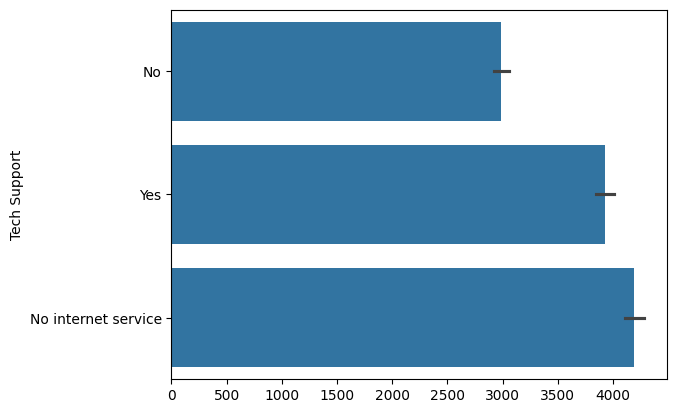

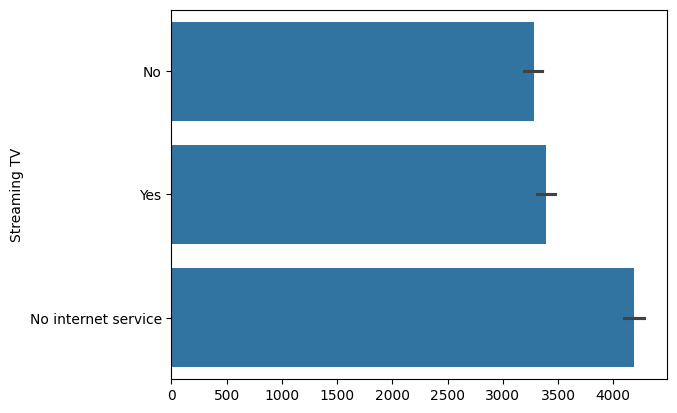

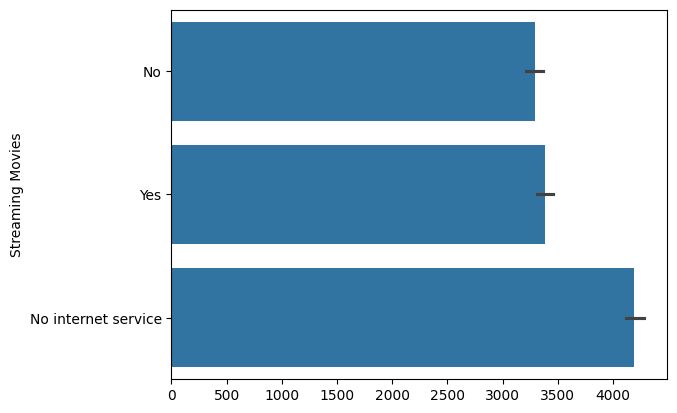

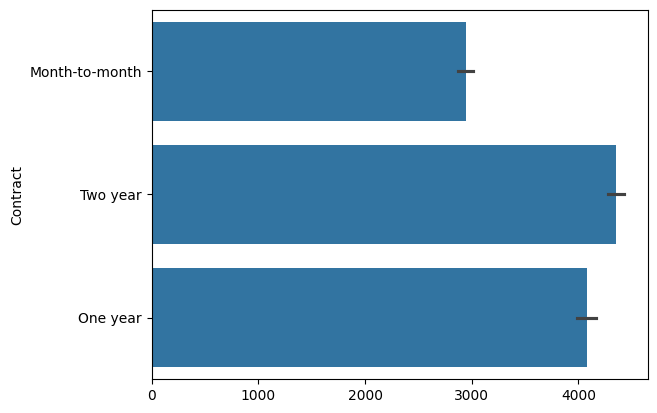

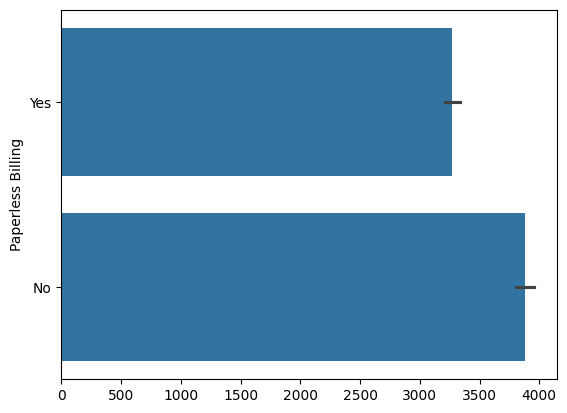

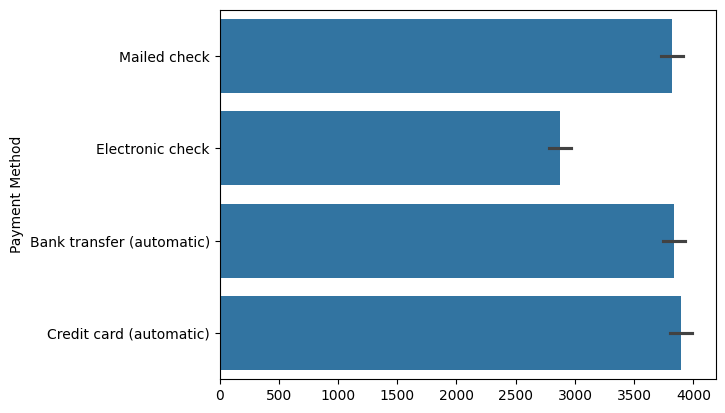

In [13]:
cat_cols = data.select_dtypes(include = "object").columns
for col in cat_cols:
    sns.barplot(data[col])
    plt.show()

In [14]:
data_eng = data.copy()
data_eng["Gender"] = np.where(data["Gender"] == "Male", 0, 1)
for col in cat_cols.drop(["Gender", "Internet Service", "Contract", "Payment Method"]):
    data_eng[col] = np.where(data[col] == "Yes", 1, 0)
data_eng = pd.get_dummies(data_eng, columns = ['Internet Service', 'Contract', 'Payment Method'], drop_first = True, dtype = int)
data_eng

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Total Charges,Churn Value,CLTV,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,0,0,0,2,1,0,1,1,0,...,108.15,1,3239,0,0,0,0,0,0,1
1,1,0,0,1,2,1,0,0,0,0,...,151.65,1,2701,1,0,0,0,0,1,0
2,1,0,0,1,8,1,1,0,0,1,...,820.50,1,5372,1,0,0,0,0,1,0
3,1,0,1,1,28,1,1,0,0,1,...,3046.05,1,5003,1,0,0,0,0,1,0
4,0,0,0,1,49,1,1,0,1,1,...,5036.30,1,5340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,72,1,0,0,0,0,...,1419.40,0,5306,0,1,0,1,0,0,0
7039,0,0,1,1,24,1,1,1,0,1,...,1990.50,0,2140,0,0,1,0,0,0,1
7040,1,0,1,1,72,1,1,0,1,1,...,7362.90,0,5560,1,0,1,0,1,0,0
7041,1,0,1,1,11,0,0,1,0,0,...,346.45,0,2793,0,0,0,0,0,1,0


In [15]:
data_eng.shape

(7043, 25)

# Cluster Analysis and Segmentation

In [16]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(data_eng)
df = pd.DataFrame(data_std, columns = data_eng.columns)

In [17]:
#Importing PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 25, random_state = 42)
np.cumsum(pca.fit(df).explained_variance_ratio_)


array([0.22192069, 0.35727469, 0.42265383, 0.47268938, 0.52042748,
       0.56662446, 0.60787683, 0.64789637, 0.68420059, 0.71996438,
       0.75349467, 0.78378447, 0.81156467, 0.83804309, 0.86281542,
       0.88686405, 0.91045726, 0.93049425, 0.94910959, 0.96737331,
       0.97867425, 0.9885139 , 0.99766815, 0.99996717, 1.        ])

In [18]:
#fitting PCA with 15 components
pca15 = PCA(n_components = 15, random_state = 42)
df_transformed = pca15.fit_transform(df)

## KMeans

In [19]:
#Identifying optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia_scores = []
silhouette_scores = []
for n_cluster in range(2, 16):
    kmeans = KMeans(n_clusters = n_cluster, n_init = 10, random_state = 42)
    kmeans.fit(df_transformed)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_transformed, kmeans.labels_))

Text(0, 0.5, 'Inertia')

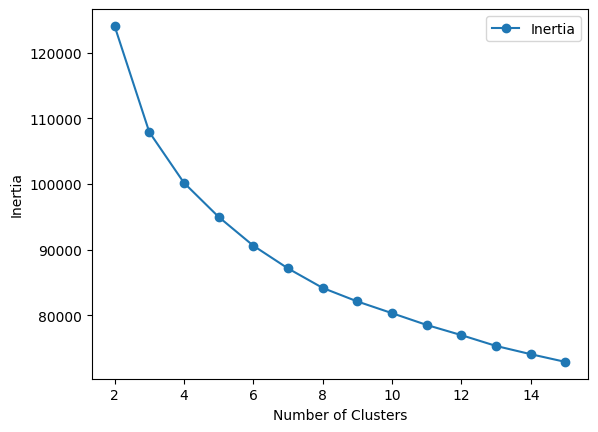

In [20]:
pd.DataFrame(data = inertia_scores, index = range(2, 16), columns = ["Inertia"]).plot(marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

Text(0, 0.5, 'Silhouette Score')

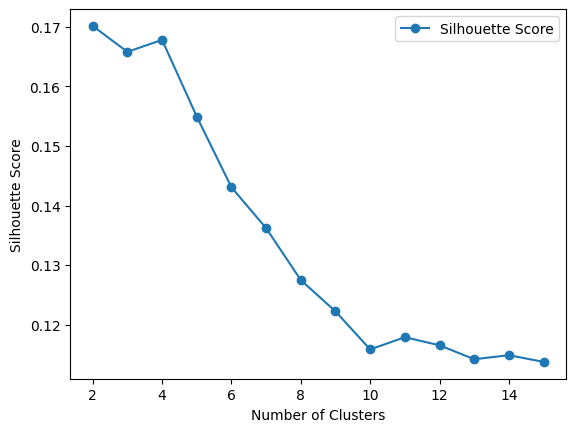

In [21]:
pd.DataFrame(data = silhouette_scores, index = range(2, 16), columns = ["Silhouette Score"]).plot(marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

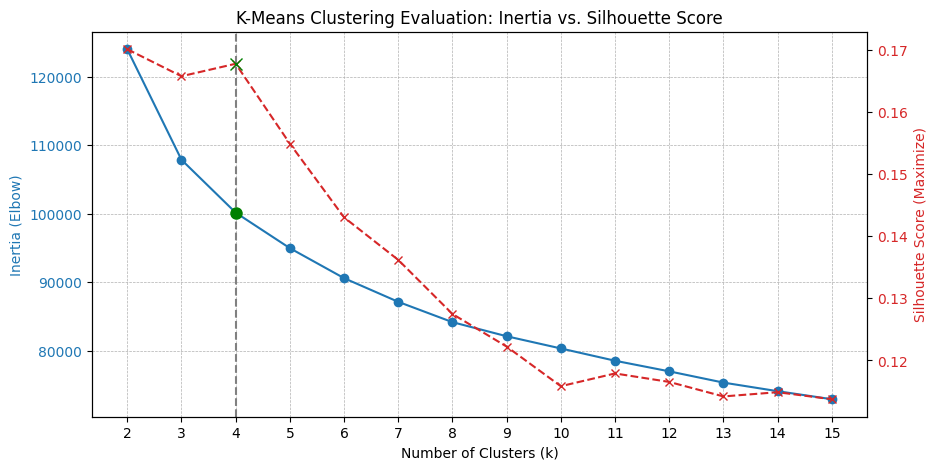

In [22]:
import matplotlib.pyplot as plt
import pandas as pd


# 1. Preparing data lists
k_values = range(2, 16)
silhouette = silhouette_scores
inertia = inertia_scores

# 2. Setting the plot with a primary axis (ax1) for Inertia
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Inertia (Elbow Method) on ax1
color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Elbow)', color=color)
ax1.plot(k_values, inertia, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(k_values) # Ensure all k values are shown

# 3. Create a second Y-axis (ax2) sharing the same X-axis
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Silhouette Score (Maximize)', color=color)  
ax2.plot(k_values, silhouette, marker='x', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 4. Final Touches
plt.title('K-Means Clustering Evaluation: Inertia vs. Silhouette Score')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Highlight k=4
# Find the specific values for k=4 for the highlighting markers
inertia_at_k4 = inertia[2]
silhouette_at_k4 = silhouette[2]

ax1.axvline(x=4, color='gray', linestyle='--')
ax1.plot(4, inertia_at_k4, 'o', color='green', markersize=8)
ax2.plot(4, silhouette_at_k4, 'x', color='green', markersize=8)

plt.show() 

### Kmeans == 4

In [23]:
# Fitting a 4 cluster kmeans model
kmeans4 = KMeans(4, n_init = 10, random_state = 42)
kmeans4.fit(df_transformed)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [24]:
from collections import Counter
labels = kmeans4.labels_
Counter(labels)

Counter({3: 2062, 0: 1887, 2: 1623, 1: 1471})

### Cluster Profiling

In [25]:
data_c = data_eng.assign(ClusterID = labels)

In [26]:
clusters = data_c.groupby("ClusterID")

In [27]:
clusters.agg({"Tenure Months":"mean"})

,Tenure Months
ClusterID,
0,58.546900
1,24.989123
2,29.606285
3,15.859360


* 0: Longest Tenure
* 3: Shortest Tenure

In [28]:
clusters.agg({"Monthly Charges":"mean"})

,Monthly Charges
ClusterID,
0,92.583545
1,51.738375
2,22.686137
3,81.709360


* 0: highest monthly charges
* 1: Average
* 2: Very low monthly charges
* 3: High monthly charges 

In [29]:
clusters.agg({"Total Charges":"mean"})

,Total Charges
ClusterID,
0,5423.026736
1,1325.616893
2,666.869470
3,1353.349006


* 0: VIP customers
* 2: Low valued customers

In [30]:
clusters.agg({"Contract_One year":"mean", "Contract_Two year":"mean"}).assign(Month_to_month = lambda x: 1 - x["Contract_Two year"] - x["Contract_One year"] )

,Contract_One year,Contract_Two year,Month_to_month
ClusterID,,,
0,0.333863,0.469528,0.196608
1,0.271244,0.111489,0.617267
2,0.227973,0.396180,0.375847
3,0.035887,0.000970,0.963143


* 0 : Highly committed
* 3: Very Low customers

In [31]:
(
    clusters
    .agg(
        {
            'Payment Method_Credit card (automatic)':"mean",
            'Payment Method_Electronic check':"mean",
            'Payment Method_Mailed check':"mean"})
    .assign(Bank_transfer_automatic = (lambda x: 1 - x["Payment Method_Credit card (automatic)"] - x["Payment Method_Electronic check"] - x["Payment Method_Mailed check"])
           )  
)

,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Bank_transfer_automatic
ClusterID,,,,
0,0.351351,0.248543,0.069952,0.330154
1,0.205982,0.252209,0.327668,0.214140
2,0.208872,0.078250,0.499692,0.213185
3,0.105238,0.677983,0.090689,0.126091


* 0 : rarely uses mailcheck
* 1: Fairly distributed
* 2: prefers mailed checks
* 3: prefers elctronic check

In [32]:
clusters.agg({"Churn Value":"mean"})

,Churn Value
ClusterID,
0,0.099099
1,0.195105
2,0.078866
3,0.614452


* Cluster 3 has very high churn rate

In [33]:
clusters.agg({"Gender":"mean"})

,Gender
ClusterID,
0,0.500795
1,0.482665
2,0.491682
3,0.501940


* Gender is fairly distributed

In [34]:
cols = list(cat_cols.drop(["Gender", "Internet Service", "Contract", "Payment Method"]))
cols.append("ClusterID")

In [35]:
clusters = data_c[cols].groupby("ClusterID")

<Axes: ylabel='ClusterID'>

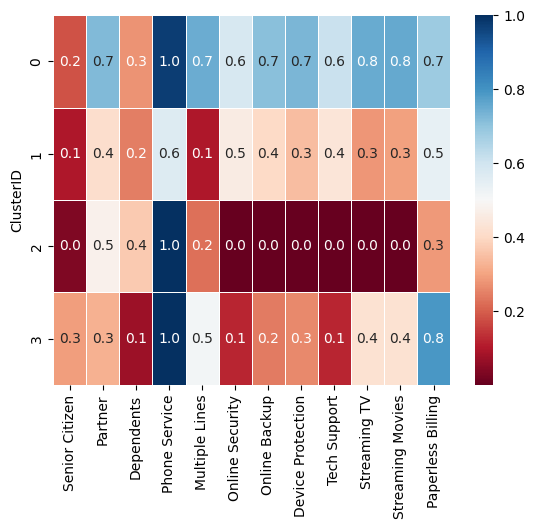

In [36]:
sns.heatmap(clusters.mean(), annot=True, cmap="RdBu", fmt=".1f", linewidths=.5)

* Cluster 0: Apply for all services
* Cluster 1: Mix of services
* Cluster 2: Only apply for phone service
* Cluster 3: Low Security/Tech Support usage

## Cluster Profiles
#### Cluster 0 - High Value Loyalists
* VIP Tier
* Highest Tenure (58.5 mos) and Charges (92.6/mo, $5.4k total).
* Highest commitment (∼80% 1/2-Year Contract).
* Low Churn (9.9%).
* Highest service penetration (Security, Backup, Streaming).

#### Cluster 1 - Mid-Tier Customers
* Mid-Tier, Moderate Risk.
* Moderate Tenure (25.0 mos) and Charges (51.7/mo).
* Moderate Churn (19.5%).
* Mix of services, but not the high-end bundles.
* This group is currently flexible.

#### Cluster 2 - Phone Users 
* Budget Tier, Stable.
* Lowest Charges (22.7/mo).
* Moderate Tenure (29.6 mos).
* Lowest Churn (7.9%).
* Extremely low/zero Internet service usage.
* They are essentially a Phone-Only segment.

#### Cluster 3 - Urgent Churners
* Highest Risk.
* Extremely High Churn (61.4%).
* Lowest Tenure (15.9 mos).
* High Monthly Charges (81.7/mo).
* Crucially, 96.3% of this cluster is on the low-commitment contract (Month-to-Month).
* Low Security/Tech Support usage

## Recommendations
#### Cluster 0 - High Value Loyalists
* Focus on relationship management.
* Offer exclusive, personalized rewards or next-tier tech upgrades to prevent poaching by competitors.

#### Cluster 1 - Mid-Tier Customers
* Target for commitment.
* Offer personalized offers for a 1-year contract, bundled with an incentive like a free month of Tech Support.

#### Cluster 2 - Phone Users 
* Ensure stability.
* Low opportunity for upselling internet, but ensure phone service reliability.
*  Offer plans like a "family budget plan" for additional lines.

#### Cluster 3 - Urgent Churners
* Highest priority. Offer services (Tech Support, Online Security) for free/cheap to improve loyalty, followed immediately by aggressive, short-term contract discounts.

### Visualizing clusters

<Axes: xlabel='PC1', ylabel='PC2'>

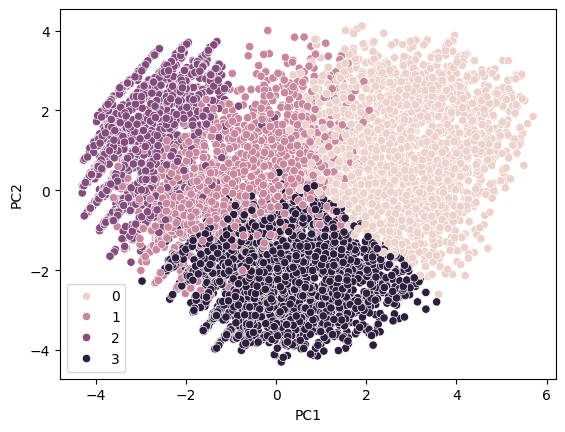

In [37]:
pca2 = PCA(2, random_state = 42)
new_df = pca2.fit_transform(df)
new_df = pd.DataFrame(new_df, columns = ["PC1", "PC2"])
sns.scatterplot(new_df, x = "PC1", y = "PC2", hue = labels)

# Churn Prediction Modelling

In [38]:
data_c.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Churn Value,CLTV,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,ClusterID
0,0,0,0,0,2,1,0,1,1,0,...,1,3239,0,0,0,0,0,0,1,1
1,1,0,0,1,2,1,0,0,0,0,...,1,2701,1,0,0,0,0,1,0,3
2,1,0,0,1,8,1,1,0,0,1,...,1,5372,1,0,0,0,0,1,0,3
3,1,0,1,1,28,1,1,0,0,1,...,1,5003,1,0,0,0,0,1,0,3
4,0,0,0,1,49,1,1,0,1,1,...,1,5340,1,0,0,0,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split
x = data_c.drop("Churn Value", axis = 1)
y = data_c["Churn Value"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [40]:
scaler = StandardScaler()
scaler.fit(x_train)
X_train_std = scaler.transform(x_train)
X_test_std = scaler.transform(x_test)

In [41]:
y_train.value_counts(normalize = True)

Churn Value
0    0.739262
1    0.260738
Name: proportion, dtype: float64

In [42]:
import imblearn.over_sampling as OS


smt = OS.SMOTE(
    sampling_strategy="auto",
    random_state=2023
)

X_train_smt, y_train_smt = smt.fit_resample(X_train_std, y_train)

## Logistic Regression

In [43]:
# Fitting LR model without smote
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)

lr = logreg.fit(X_train_std, y_train)

print(f"Train Accuracy: {lr.score(X_train_std, y_train)}")
print(f"Test Accuracy: {lr.score(X_test_std, y_test)}")

Train Accuracy: 0.8205537806176784
Test Accuracy: 0.8147622427253371


In [44]:
# Fitting LR model with smote
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)

lr_smt = logreg.fit(X_train_smt, y_train_smt)

print(f"Train Accuracy: {lr_smt.score(X_train_smt, y_train_smt)}")
print(f"Test Accuracy: {lr_smt.score(X_test_std, y_test)}")

Train Accuracy: 0.7959183673469388
Test Accuracy: 0.7778566359119943


In [45]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "C": np.linspace(.1, 1.1, 11),
    "penalty": ["l1", "l2"],
}

gridsearch = GridSearchCV(LogisticRegression(solver="saga", max_iter=1000), parameters)

gridsearch.fit(X_train_std, y_train)

best_parameters = gridsearch.best_params_
best_parameters

{'C': 0.4, 'penalty': 'l1'}

In [46]:
logreg = LogisticRegression(max_iter=5000, solver="saga", **best_parameters)

lr_tuned = logreg.fit(X_train_std, y_train)

print(f"Train Accuracy: {lr_tuned.score(X_train_std, y_train)}")
print(f"Test Accuracy: {lr_tuned.score(X_test_std, y_test)}")

Train Accuracy: 0.8207312744053958
Test Accuracy: 0.8140525195173882


<Axes: >

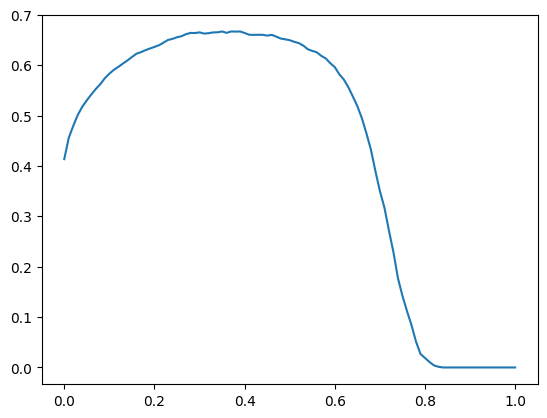

In [47]:
from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(lr_tuned.predict_proba(X_train_std)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=thresholds, y=f1)

In [48]:
thresh = thresholds[f1.index(max(f1))]

thresh

0.39

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
preds = lr_tuned.predict_proba(X_test_std)[:, 1] > thresh

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")

Accuracy: 0.8041163946061036
Precision: 0.6383928571428571
Recall: 0.715
F1: 0.6745283018867925


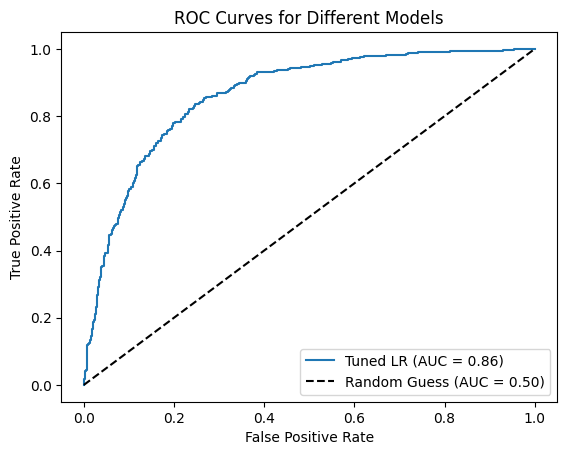

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
    
# Generate ROC AUC for tuned model
y_probs = lr_tuned.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)


# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Tuned LR (AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

rf.fit(X_train_std, y_train)

print(f"RF Train Accuracy: {rf.score(X_train_std, y_train)}")
print(f"RF Test Accuracy: {rf.score(X_test_std, y_test)}")


RF Train Accuracy: 1.0
RF Test Accuracy: 0.8090844570617459


In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_smt = RandomForestClassifier(random_state=2023, n_jobs=-1)

rf_smt.fit(X_train_smt, y_train_smt)

print(f"RF Train Accuracy: {rf.score(X_train_smt, y_train_smt)}")
print(f"RF Test Accuracy: {rf.score(X_test_std, y_test)}")


RF Train Accuracy: 0.9391356542617046
RF Test Accuracy: 0.8090844570617459


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
      
rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=50, stop=1050, step=100),
    'max_features': ["sqrt"],
    'bootstrap': [True],
    'max_samples': [.3, .5, .9],
    'max_depth': np.arange(start=3, stop=11, step=2),
    'min_samples_leaf': [2, 5, 10, 20, 100],
}
grid = RandomizedSearchCV(
    rf, 
    params,
    n_iter=100,
    scoring="accuracy"
)

grid.fit(X_train_smt, y_train_smt)

grid.best_params_

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
      
rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=225, stop=301, step=25),
    'max_features': ["sqrt"],
    'bootstrap': [True],
    'max_samples': [.9],
    'max_depth': [9],
    'min_samples_leaf': [2, 3],
}
grid = RandomizedSearchCV(
    rf, 
    params,
    n_iter=100,
    scoring="accuracy"
)

grid.fit(X_train_smt, y_train_smt)

best_params = grid.best_params_

In [ ]:
best_params

In [53]:
from sklearn.model_selection import GridSearchCV
      
rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=210, stop=225, step=5),
    'max_features': ["sqrt"],
    'bootstrap': [True],
    'max_samples': [.9],
    'max_depth': [9],
    'min_samples_leaf': [2],
}
grid = GridSearchCV(
    rf, 
    params,
    scoring="accuracy"
)

grid.fit(X_train_smt, y_train_smt)

best_params = grid.best_params_

In [54]:
best_params

{'bootstrap': True,
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'n_estimators': 220}

In [55]:
rf_tuned = RandomForestClassifier(**best_params, random_state=2023, n_jobs=-1)

rf_tuned.fit(X_train_std, y_train)

print(f"RF Train Accuracy: {rf_tuned.score(X_train_std, y_train)}")
print(f"RF Test Accuracy: {rf_tuned.score(X_test_std, y_test)}")


RF Train Accuracy: 0.8709620163294285
RF Test Accuracy: 0.8161816891412349


<Axes: >

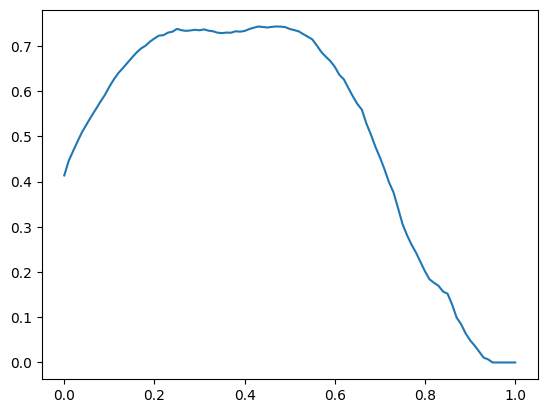

In [56]:
from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(rf_tuned.predict_proba(X_train_std)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=thresholds, y=f1)

In [57]:
thresh = thresholds[f1.index(max(f1))]

thresh

0.47000000000000003

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
preds = rf_tuned.predict_proba(X_test_std)[:, 1] > thresh

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")

Accuracy: 0.8168914123491838
Precision: 0.6829896907216495
Recall: 0.6625
F1: 0.6725888324873096


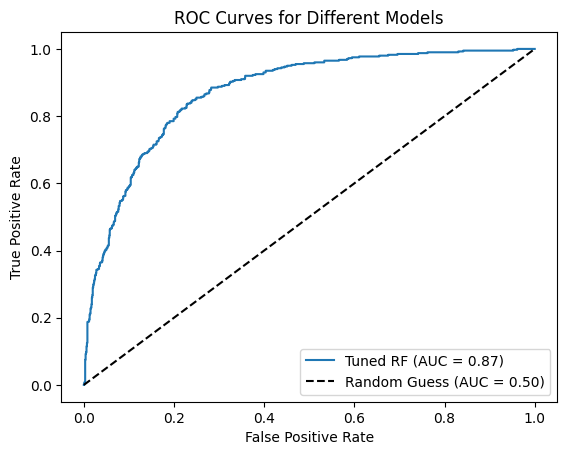

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
    
# Generate ROC AUC for tuned model
y_probs = rf_tuned.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)


# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Tuned RF (AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

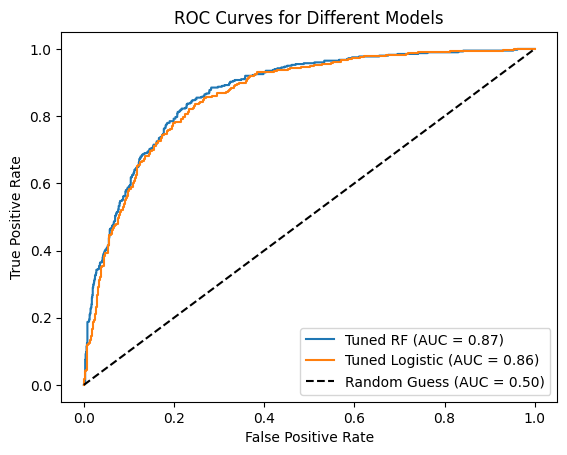

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
    
# Generate ROC AUC for tuned RF model
y_probs = rf_tuned.predict_proba(X_test_std)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)
auc_score1 = auc(fpr1, tpr1)


# Generate ROC AUC for tuned Logistic Regression model
y_probs = lr_tuned.predict_proba(X_test_std)[:, 1]
fpr3, tpr3, thresholds = roc_curve(y_test, y_probs)
auc_score3 = auc(fpr3, tpr3)

# Plot the ROC curve
plt.plot(fpr1, tpr1, label=f'Tuned RF (AUC = {auc_score1:.2f})')
plt.plot(fpr3, tpr3, label=f'Tuned Logistic (AUC = {auc_score3:.2f})')


# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

In [61]:
churn_predictions = rf_tuned.predict_proba(scaler.transform(x))[:, 1]

### Random Forest Model Interpretation

In [62]:
import shap

explainer = shap.Explainer(rf_tuned)

shap_values = explainer(pd.DataFrame(X_test_std, columns = x_test.columns).sample(200, random_state=12345))

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='Importance', ylabel='Feature'>

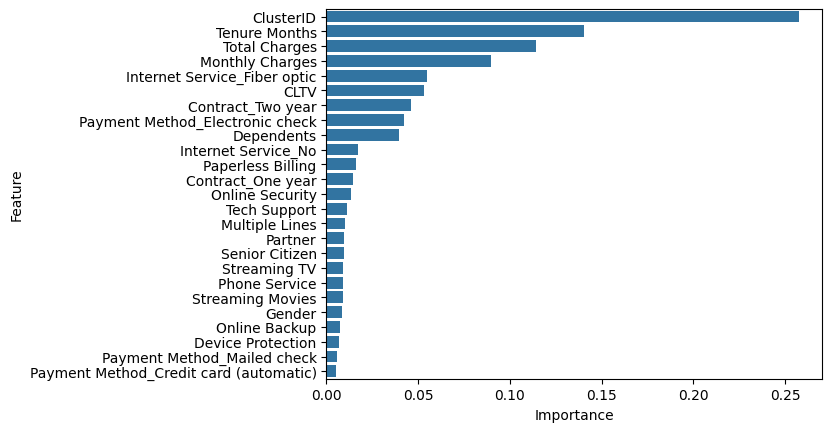

In [63]:
importance_df = (
    pd.DataFrame({"Feature": x_train.columns, "Importance": rf_tuned.feature_importances_})
    .sort_values("Importance", ascending=False)
)

sns.barplot(importance_df, x="Importance", y="Feature" )

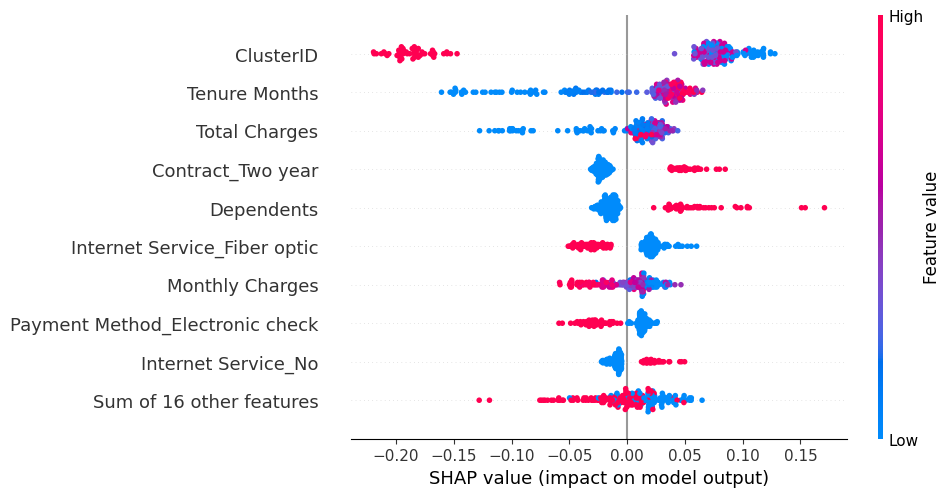

In [64]:
shap.plots.beeswarm(shap_values[:, :, 0])

* The most important feature by a significant margin is ClusterID. It's a stronger predictor of churn than any original feature
* The next three most important original features relate directly to customer commitment and financial burden.
* Lower tenure is strongly correlated with higher churn.
* A higher total spend over time suggests a deeper, more committed relationship. Higher values predict lower churn.
* Higher monthly charges (especially in the "Urgent Churner" cluster) contribute to higher risk.

# Regression Analysis

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

<Axes: xlabel='CLTV', ylabel='Count'>

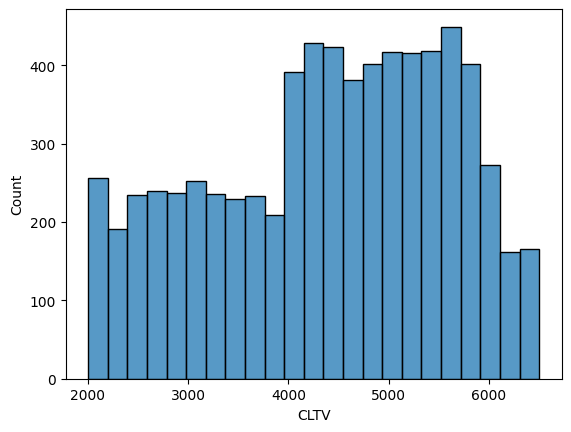

In [66]:
sns.histplot(data_c["CLTV"])

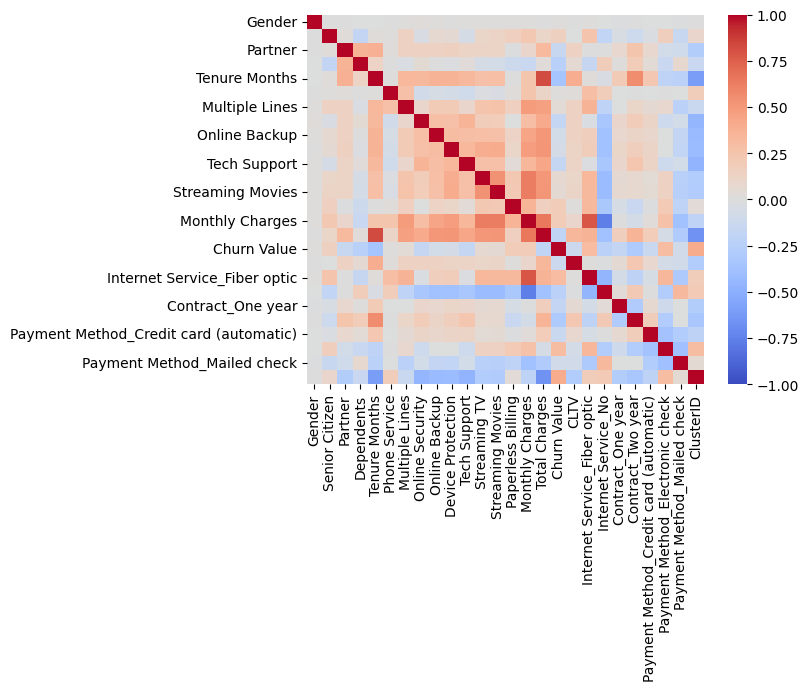

In [67]:
sns.heatmap(
    data_c.corr(numeric_only=True), 
    vmin=-1, 
    vmax=1, 
    cmap="coolwarm",
);

In [68]:
from sklearn.model_selection import train_test_split
x = data_c.drop(["Churn Value", "CLTV"], axis = 1)
y = data_c["CLTV"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [69]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)

In [70]:
lr_model = LinearRegression().fit(X_train_std, y_train)
print(f"R2: {lr_model.score(X_train_std, y_train)}")
print(f"MAE: {mae(y_train, lr_model.predict(X_train_std))}")


R2: 0.16556784459253582
MAE: 912.2323483273466


In [71]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = 10 ** np.linspace(-2, 3, n_alphas)

lasso_model = LassoCV(alphas=alphas, cv=5)

lasso_model.fit(X_train_std, y_train)

print(f"Cross Val R2: {lasso_model.score(X_train_std, y_train)}")
print(f"Cross Val MAE: {mae(y_train, lasso_model.predict(X_train_std))}")
print(f"Alpha: {lasso_model.alpha_}")

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1039561.0482473373, tolerance: 638974.9088379411
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1185543.4848995209, tolerance: 638974.9088379411
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1315713.1318969727, tolerance: 638974.9088379411
  model = cd_fast.enet_coordinate_descent_gram(
C:\U

Cross Val R2: 0.16504786159312945
Cross Val MAE: 912.859082710919
Alpha: 3.2550885998350596


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2386297.363995552, tolerance: 634702.089527773
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2386202.80539608, tolerance: 634702.089527773
  model = cd_fast.enet_coordinate_descent_gram(


In [72]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
alphas = 10 ** np.linspace(-2, 3, n_alphas)

ridge_model = RidgeCV(alphas=alphas, cv=5)

ridge_model.fit(X_train_std, y_train)

print(f"Cross Val R2: {ridge_model.score(X_train_std, y_train)}")
print(f"Cross Val MAE: {mae(y_train, ridge_model.predict(X_train_std))}")
print(f"Alpha: {ridge_model.alpha_}")

Cross Val R2: 0.16520999687912097
Cross Val MAE: 912.5880053688801
Alpha: 83.09941949353396


In [73]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(X_train_std, y_train)
print(f"R2: {rfr.score(X_train_std, y_train)}")
print(f"MAE: {mae(y_train, rfr.predict(X_train_std))}")


R2: 0.8765188631862655
MAE: 344.2405446770176


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfr = RandomForestRegressor(n_jobs=-1, random_state = 42)
params = {
    'n_estimators': np.arange(start=50, stop=1050, step=100),
    'max_features': ["sqrt"],
    'bootstrap': [True],
    'max_samples': [.3, .5, .9],
    'max_depth': np.arange(start=3, stop=11, step=2),
    'min_samples_leaf': [2, 5, 10, 20, 100],
}
grid = RandomizedSearchCV(
    rfr, 
    params,
    n_iter=50,
    scoring="neg_mean_squared_error"
)

grid.fit(X_train_std, y_train)

best_params = grid.best_params_

In [ ]:
best_params

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(n_jobs=-1, random_state = 42)
params = {
    'n_estimators': np.arange(start=900, stop=960, step=10),
    'max_features': ["sqrt"],
    'bootstrap': [True],
    'max_samples': [.9],
    'max_depth': [6,7],
    'min_samples_leaf': [4, 5]
}
grid = GridSearchCV(
    rfr, 
    params,
    scoring="neg_mean_squared_error"
)

grid.fit(X_train_std, y_train)

best_params = grid.best_params_

In [75]:
best_params

{'bootstrap': True,
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 4,
 'n_estimators': 950}

In [76]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(**best_params, random_state = 42)
rfr.fit(X_train_std, y_train)
print(f"R2: {rfr.score(X_train_std, y_train)}")
print(f"MAE: {mae(y_train, rfr.predict(X_train_std))}")


R2: 0.2686648594807215
MAE: 858.9932993148778


In [77]:
print(f"R2: {rfr.score(X_test_std, y_test)}")
print(f"MAE: {mae(y_test, rfr.predict(X_test_std))}")


R2: 0.2246997028416009
MAE: 875.4376102289334


In [78]:
cltv_predictions = rfr.predict(scaler.transform(x))

<Axes: xlabel='Importance', ylabel='Feature'>

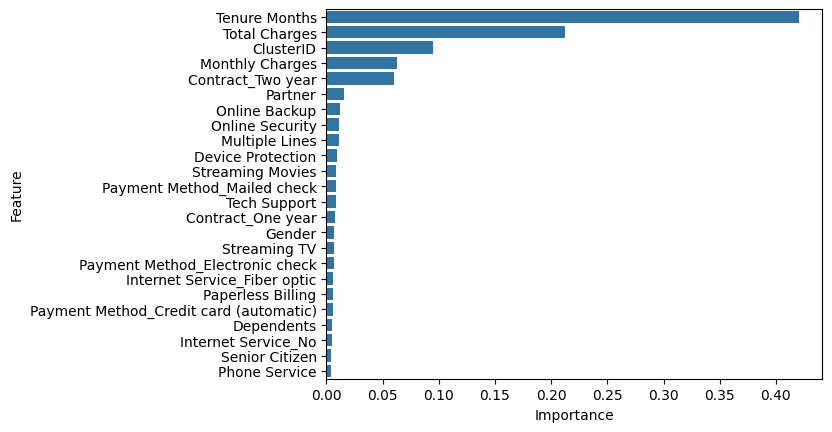

In [79]:
importance_df = (
    pd.DataFrame({"Feature": x_train.columns, "Importance": rfr.feature_importances_})
    .sort_values("Importance", ascending=False)
)

sns.barplot(importance_df, x="Importance", y="Feature" )

* Tenure Months is the highest predictor, the longer a customer stays, the higher their lifetime value.
* Total Charges is the next highest, which makes business sense
* ClusterID is a very actionable feature. It defines the customer group and is crucial for both risk assessment and value segmentation.
* High tenure prevents churn and predicts high value. This is the ideal loyalty metric.

### Prioritization Matrix

In [81]:
data = {
    'ClusterID': data_c["ClusterID"],
    'Churn_Probability': churn_predictions,
    'Predicted_CLTV': cltv_predictions
}
df_final = pd.DataFrame(data)

In [82]:
def create_prioritization_matrix(df):
    """
    Creates the 2x2 prioritization matrix based on Churn Risk and Predicted CLTV.
    """
    # Churn Risk Threshold (50%)
    CHURN_THRESHOLD = 0.50
    
    # CLTV Value Threshold ( Median )
    CLTV_THRESHOLD = df['Predicted_CLTV'].median()
    
    print(f"Calculated CLTV Median Threshold: ${CLTV_THRESHOLD:,.0f}")
        
    # Create Binary Risk Column
    df['Risk_Tier'] = np.where(
        df['Churn_Probability'] > CHURN_THRESHOLD,
        'High Risk',
        'Low Risk'
    )
    
    # Create Binary Value Column
    df['Value_Tier'] = np.where(
        df['Predicted_CLTV'] > CLTV_THRESHOLD,
        'High Value',
        'Low Value'
    )
    
    # The Prioritization Matrix
    
    # Quadrant Mapping: Risk + Value
    # Quadrant I: High Risk + High Value (Urgent Action)
    # Quadrant II: Low Risk + High Value (Retain & Reward)
    # Quadrant III: High Risk + Low Value (Budgeted Review)
    # Quadrant IV: Low Risk + Low Value (Passive Monitor)
    
    df['Prioritization_Quadrant'] = np.select(
        [
            (df['Risk_Tier'] == 'High Risk') & (df['Value_Tier'] == 'High Value'),
            (df['Risk_Tier'] == 'Low Risk') & (df['Value_Tier'] == 'High Value'),
            (df['Risk_Tier'] == 'High Risk') & (df['Value_Tier'] == 'Low Value'),
            (df['Risk_Tier'] == 'Low Risk') & (df['Value_Tier'] == 'Low Value')
        ],
        [
            'I: Urgent Action (Must Save)',
            'II: Retain & Reward (Keep Happy)',
            'III: Budgeted Review (Low Priority)',
            'IV: Passive Maintenance (Monitor)'
        ],
        default='Error'
    )
    
    return df



In [83]:
# Applying the function
df_final = create_prioritization_matrix(df_final)

# Using the ClusterID to analyze the composition of the most critical quadrant
print("\n--- Analysis of Critical Quadrant (I: Urgent Action) ---")
critical_customers = df_final[df_final['Prioritization_Quadrant'] == 'I: Urgent Action (Must Save)']

cluster_breakdown = critical_customers['ClusterID'].value_counts(normalize=True).mul(100).round(1)
print(f"Total customers in Urgent Action quadrant: {len(critical_customers)}")
print("\nCluster Composition of Urgent Action Group:")
print(cluster_breakdown)

# The result here will show you what percentage of most critical customers 
# belong to the 'Urgent Churners' cluster (Cluster 3), confirming analysis.

print("\n--- Final Prioritization Head ---")
print(df_final[['ClusterID', 'Churn_Probability', 'Predicted_CLTV', 'Prioritization_Quadrant']].head())

Calculated CLTV Median Threshold: $4,083

--- Analysis of Critical Quadrant (I: Urgent Action) ---
Total customers in Urgent Action quadrant: 153

Cluster Composition of Urgent Action Group:
ClusterID
3    74.5
1    22.9
2     2.6
Name: proportion, dtype: float64

--- Final Prioritization Head ---
   ClusterID  Churn_Probability  Predicted_CLTV  \
0          1           0.435742     4044.903227   
1          3           0.681231     4025.583219   
2          3           0.703271     4075.099112   
3          3           0.512430     4066.394345   
4          0           0.212166     5191.966411   

               Prioritization_Quadrant  
0    IV: Passive Maintenance (Monitor)  
1  III: Budgeted Review (Low Priority)  
2  III: Budgeted Review (Low Priority)  
3  III: Budgeted Review (Low Priority)  
4     II: Retain & Reward (Keep Happy)  


## Actionable Insight From Report
#### Primary Focus: Cluster 3 (The Core Churner)
* Strategy: Immediate, aggressive intervention is justified for the $\approx 75\%$ of customers in Quadrant I who belong to Cluster 3.
* Offer: A combined approach: Offer a significant discount on the Monthly Charge (to address their high cost/risk factor) in exchange for signing a Two-Year Contract (to capture the long-term value identified by the regressor).
#### Secondary Focus: Cluster 1 in Urgent Action
* Strategy: The $22.9\%$ of customers in Quadrant I who are Cluster 1 ("Mid-Tier Flex") are also high priority.
* Offer: Since they are less inherently unstable than Cluster 3, offer incentives like free premium services (e.g., streaming or device protection) to move them toward a 1-year contract commitment.
#### Budget Management (Quadrant III vs. I)
* Quadrant I: 153 customers receive the high-cost, aggressive retention offer.

* Quadrant III (Budgeted Review): These customers are High Risk but Low Value. Do not spend retention budget here. Only use automated, low-cost interventions (like a simple retention emails).